In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime, time
import os, sys
import pandas as pd
from scipy.interpolate import interp1d

sys.path.append('../')
import NEXUSFunctions as nf

import matplotlib.dates as mdates
from   pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
NR15_t0 = datetime.datetime(2022,10,13,10,59,50)
NR16_t0 = datetime.datetime(2023, 1,23,16,50, 0)
print(NR15_t0,NR16_t0)

days_span = 3

2022-10-13 10:59:50 2023-01-23 16:50:00


In [3]:
def dt_to_plc_str(dt):
    return dt.strftime("%y%m%d")
                       
def dt_to_mmr_str(dt):
    return dt.strftime("%Y-%m-%d")

print(dt_to_plc_str(NR15_t0))
print(dt_to_mmr_str(NR15_t0))

221013
2022-10-13


In [4]:
series_plc_NR15 = nf.create_date_range(dt_to_plc_str(NR15_t0), days_span+2, fmt="%y%m%d")
offset_plc_NR15 = datetime.timedelta(days=0, hours=0, minutes=0)
data_plc_NR15   = nf.read_plclog_data(series_plc_NR15, offset_plc_NR15)
# data_plc_NR15.keys()

The starting date is: 
2022-10-13 00:00:00


In [5]:
series_plc_NR16 = nf.create_date_range(dt_to_plc_str(NR16_t0), days_span, fmt="%y%m%d")
offset_plc_NR16 = datetime.timedelta(days=0, hours=0, minutes=0)
data_plc_NR16   = nf.read_plclog_data(series_plc_NR16, offset_plc_NR16)
data_plc_NR16.keys()

The starting date is: 
2023-01-23 00:00:00


Index(['date', 'heures', 'Comments', 'Pumping turbo speed', 'P1 mbar',
       'K3 mbar', 'K4 mbar', 'flow l/mn', 'FLOW µm/s', 'K5 mbar', 'K6 mbar',
       'PT100 bidon °C', 'P/T %', 'K8 mbar', 'K10 mbar', 'P2 mbar', 'P3 mbar',
       'BM - MC K', 'LAST RUN K', 'RuO2 MC', 'RuO2 CP', 'Still Stage', 'FR MC',
       '2nd Stage', '1srt Stage', 'dffsf', 'Still bottom', 'MC bottom',
       'R MMR1 1', 'R MMR1 2', 'R MMR1 3', 'R MMR2 1', 'R MMR2 2', 'R MMR2 3',
       'R MMR3 1', 'R MMR3 2', 'R MMR3 3', 'MGC3_OK', 'MC_Heater',
       'MC_heater-set', 'MC_power', 'Still_heater', 'Still_heater_set',
       'Still_power', 'Other_heater', 'Other_heater_set', 'Other_power', 'VE1',
       'VE2', 'VE3', 'VE4', 'VE5', 'VE6', 'VE7', 'VE8', 'VE9', 'VE10', 'VE11',
       'VE12', 'VE13', 'VE14', 'VE15', 'VE16', 'VE17', 'VE18', 'VE19', 'VE20',
       'VE21', 'VE22', 'VE23', 'VE24', 'VE25', 'VE26', 'VE27', 'VE28', 'VE29',
       'VE30', 'VE31', 'VE32', 'VE33', 'VE34', 'VE35', 'VE36', 'VE37', 'VE38',
       

In [6]:
data_plc_NR16['RuO2 CP']

0       19.59782
1       19.59632
2       19.59738
3       19.59539
4       19.59916
          ...   
3560    17.00314
3561    17.00506
3562    17.00349
3563    17.00340
3564    17.00470
Name: RuO2 CP, Length: 20835, dtype: float64

In [7]:
series_mmr_NR15 = nf.create_date_range(dt_to_mmr_str(NR15_t0), days_span+2)
offset_mmr_NR15 = datetime.timedelta(days=0, hours=0, minutes=0)
data_mmr_NR15   = nf.read_MACRT_data(series_mmr_NR15, offset_mmr_NR15)
# data_mmr_NR15.keys()

The starting date is: 
2022-10-13 00:00:00


In [8]:
series_mmr_NR16 = nf.create_date_range(dt_to_mmr_str(NR16_t0), days_span)
offset_mmr_NR16 = datetime.timedelta(days=0, hours=0, minutes=0)
data_mmr_NR16   = nf.read_MACRT_data(series_mmr_NR16, offset_mmr_NR16)
# data_mmr_NR16.keys()

The starting date is: 
2023-01-23 00:00:00


In [9]:
def pd_td_to_hrs(tdelta):
    return tdelta.total_seconds()/3600.

def pd_td_to_days(tdelta):
    return tdelta.total_seconds()/(24.*3600.)

In [10]:
NR15_time_mmr = (data_mmr_NR15['ctime']-NR15_t0).apply(pd_td_to_days)
NR16_time_mmr = (data_mmr_NR16['ctime']-NR16_t0).apply(pd_td_to_days)

NR15_time_plc = (data_plc_NR15['ctime']-NR15_t0).apply(pd_td_to_days)
NR16_time_plc = (data_plc_NR16['ctime']-NR16_t0).apply(pd_td_to_days)

## Make the temperature plot

<IPython.core.display.Javascript object>


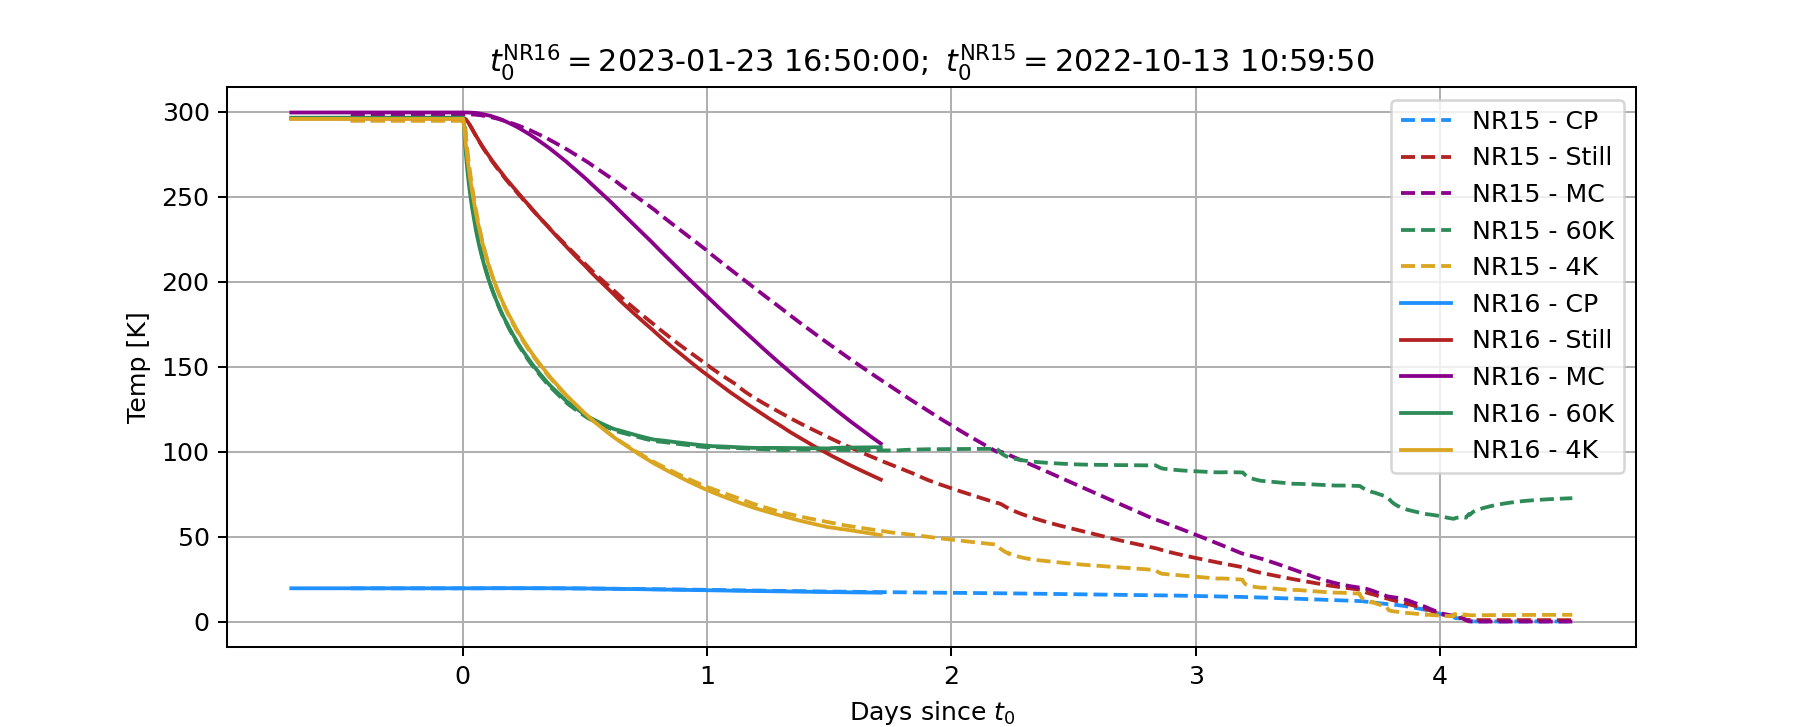

In [11]:
%matplotlib notebook
f = plt.figure(figsize = (10,4))
a = plt.gca()
a.set_xlabel(r'Days since $t_0$')
a.set_ylabel('Temp [K]')

ls_NR15 = "--"
ls_NR16 = "-"

c_CP = 'dodgerblue'
c_St = 'firebrick'
c_MC = 'darkmagenta'
c_1S = 'seagreen'
c_2S = 'goldenrod'

# ## Plot the MACRT data for Run 15
a.plot(NR15_time_mmr, data_mmr_NR15['COLD PLATE_Conv']  , label='NR15 - CP'   , color=c_CP, ls=ls_NR15)
a.plot(NR15_time_mmr, data_mmr_NR15['STILL_Conv']       , label='NR15 - Still', color=c_St, ls=ls_NR15)
a.plot(NR15_time_mmr, data_mmr_NR15['MIXING CHAMB_Conv'], label='NR15 - MC'   , color=c_MC, ls=ls_NR15)
a.plot(NR15_time_mmr, data_mmr_NR15['1ST STAGE_Conv']   , label='NR15 - 60K'  , color=c_1S, ls=ls_NR15)
a.plot(NR15_time_mmr, data_mmr_NR15['2ND STAGE_Conv']   , label='NR15 - 4K'  , color=c_2S, ls=ls_NR15)

# # ## Plot the MACRT data for Run 16
# a.plot(NR16_time_mmr, data_mmr_NR16['COLD PLATE_Conv']  , label='NR16 - CP'   , color=c_CP, ls=ls_NR16)
# a.plot(NR16_time_mmr, data_mmr_NR16['STILL_Conv']       , label='NR16 - Still', color=c_St, ls=ls_NR16)
# a.plot(NR16_time_mmr, data_mmr_NR16['MIXING CHAMB_Conv'], label='NR16 - MC'   , color=c_MC, ls=ls_NR16)
# a.plot(NR16_time_mmr, data_mmr_NR16['1ST STAGE_Conv']   , label='NR16 - 60K'  , color=c_1S, ls=ls_NR16)
# a.plot(NR16_time_mmr, data_mmr_NR16['2ND STAGE_Conv']   , label='NR16 - 4K'  , color=c_2S, ls=ls_NR16)

# ## Plot the PLC temperature data for Run 16
a.plot(NR16_time_plc, data_plc_NR16['RuO2 CP']  , label='NR16 - CP'   , color=c_CP, ls=ls_NR16)
a.plot(NR16_time_plc, data_plc_NR16['Still Stage']       , label='NR16 - Still', color=c_St, ls=ls_NR16)
a.plot(NR16_time_plc, data_plc_NR16['FR MC'], label='NR16 - MC'   , color=c_MC, ls=ls_NR16)
a.plot(NR16_time_plc, data_plc_NR16['1srt Stage']   , label='NR16 - 60K'  , color=c_1S, ls=ls_NR16)
a.plot(NR16_time_plc, data_plc_NR16['2nd Stage']   , label='NR16 - 4K'  , color=c_2S, ls=ls_NR16)

plt.title(r"$t_0^\mathrm{NR16}=$"+str(NR16_t0)+r"$;~t_0^\mathrm{NR15}=$"+str(NR15_t0))

plt.grid()
plt.legend(loc="best")
# f.autofmt_xdate()
# myFmt = mdates.DateFormatter('%H:%M:%S')
# a.xaxis.set_major_formatter(myFmt)

<IPython.core.display.Javascript object>


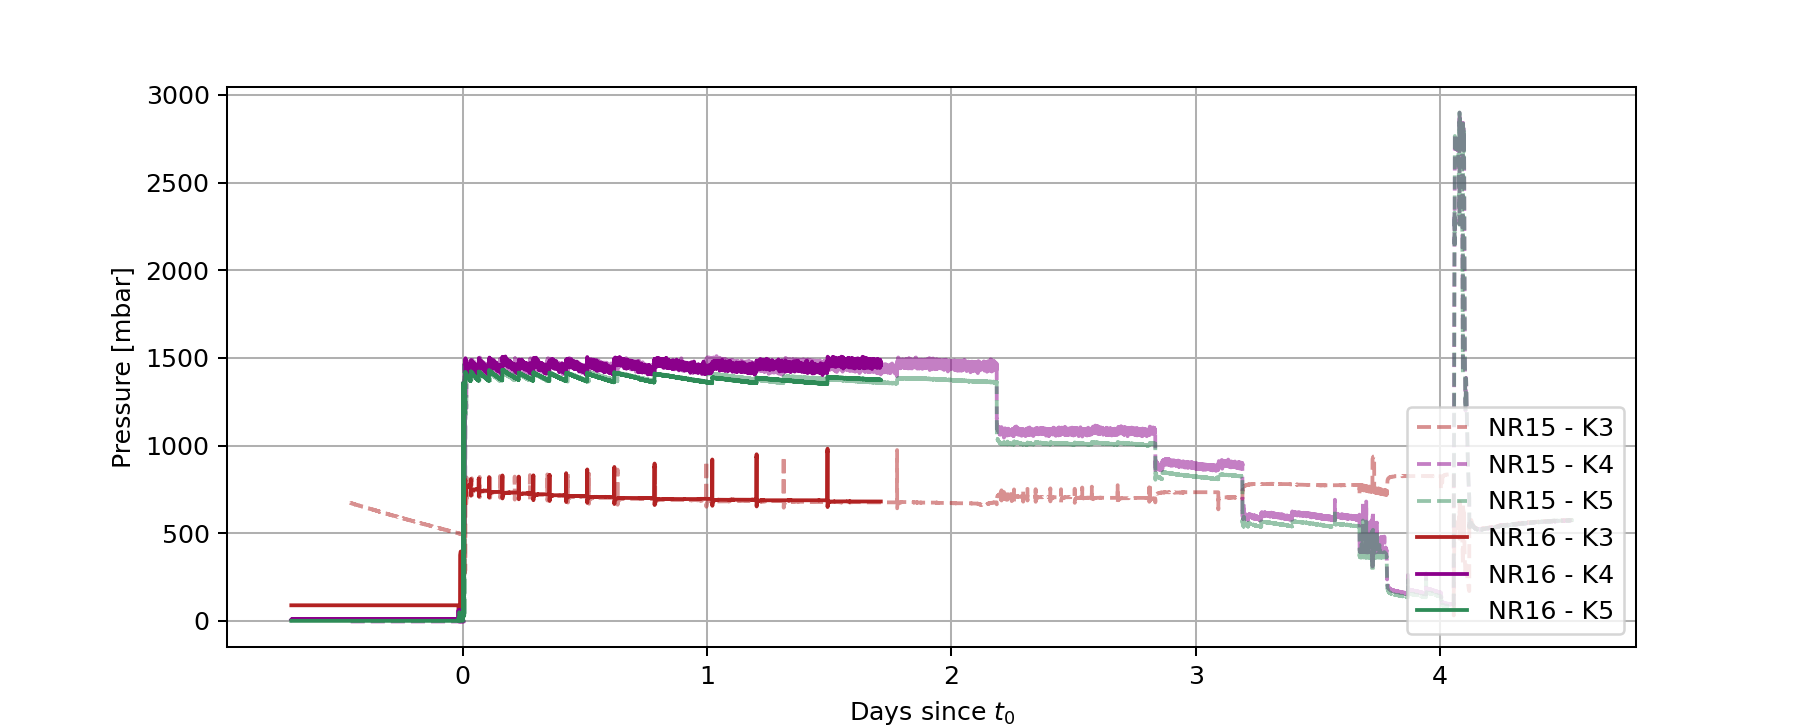

In [12]:
# %matplotlib notebook
f = plt.figure(figsize = (10,4))
a = plt.gca()
a.set_xlabel(r'Days since $t_0$')
a.set_ylabel('Pressure [mbar]')

ls_NR15 = "--"
ls_NR16 = "-"

c_P1 = 'dodgerblue'
c_K3 = 'firebrick'
c_K4 = 'darkmagenta'
c_K5 = 'seagreen'
c_K6 = 'goldenrod'
c_P2 = 'darkgrey'
c_P3 = 'olivedrab'

# ## Plot the MACRT data for Run 15
# a.plot(NR15_time_plc, data_plc_NR15['P1 mbar'], label='NR15 - P1', color=c_P1, ls=ls_NR15, alpha=0.5)
a.plot(NR15_time_plc, data_plc_NR15['K3 mbar'], label='NR15 - K3', color=c_K3, ls=ls_NR15, alpha=0.5)
a.plot(NR15_time_plc, data_plc_NR15['K4 mbar'], label='NR15 - K4', color=c_K4, ls=ls_NR15, alpha=0.5)
a.plot(NR15_time_plc, data_plc_NR15['K5 mbar'], label='NR15 - K5', color=c_K5, ls=ls_NR15, alpha=0.5)
# a.plot(NR15_time_plc, data_plc_NR15['K6 mbar'], label='NR15 - K6', color=c_K6, ls=ls_NR15, alpha=0.5)
# a.plot(NR15_time_plc, data_plc_NR15['P2 mbar'], label='NR15 - P2', color=c_P2, ls=ls_NR15, alpha=0.5)
# a.plot(NR15_time_plc, data_plc_NR15['P3 mbar'], label='NR15 - P3', color=c_P3, ls=ls_NR15, alpha=0.5)

# ## Plot the MACRT data for Run 16
# a.plot(NR16_time_plc, data_plc_NR16['P1 mbar'], label='NR16 - P1', color=c_P1, ls=ls_NR16)
a.plot(NR16_time_plc, data_plc_NR16['K3 mbar'], label='NR16 - K3', color=c_K3, ls=ls_NR16)
a.plot(NR16_time_plc, data_plc_NR16['K4 mbar'], label='NR16 - K4', color=c_K4, ls=ls_NR16)
a.plot(NR16_time_plc, data_plc_NR16['K5 mbar'], label='NR16 - K5', color=c_K5, ls=ls_NR16)
# a.plot(NR16_time_plc, data_plc_NR16['K6 mbar'], label='NR16 - K6', color=c_K6, ls=ls_NR16)
# a.plot(NR16_time_plc, data_plc_NR16['P2 mbar'], label='NR16 - P2', color=c_P2, ls=ls_NR16)
# a.plot(NR16_time_plc, data_plc_NR16['P3 mbar'], label='NR16 - P3', color=c_P3, ls=ls_NR16)

# a.set_yscale('log')

plt.grid()
plt.legend(loc="lower right")
# f.autofmt_xdate()
# myFmt = mdates.DateFormatter('%H:%M:%S')
# a.xaxis.set_major_formatter(myFmt)

<IPython.core.display.Javascript object>


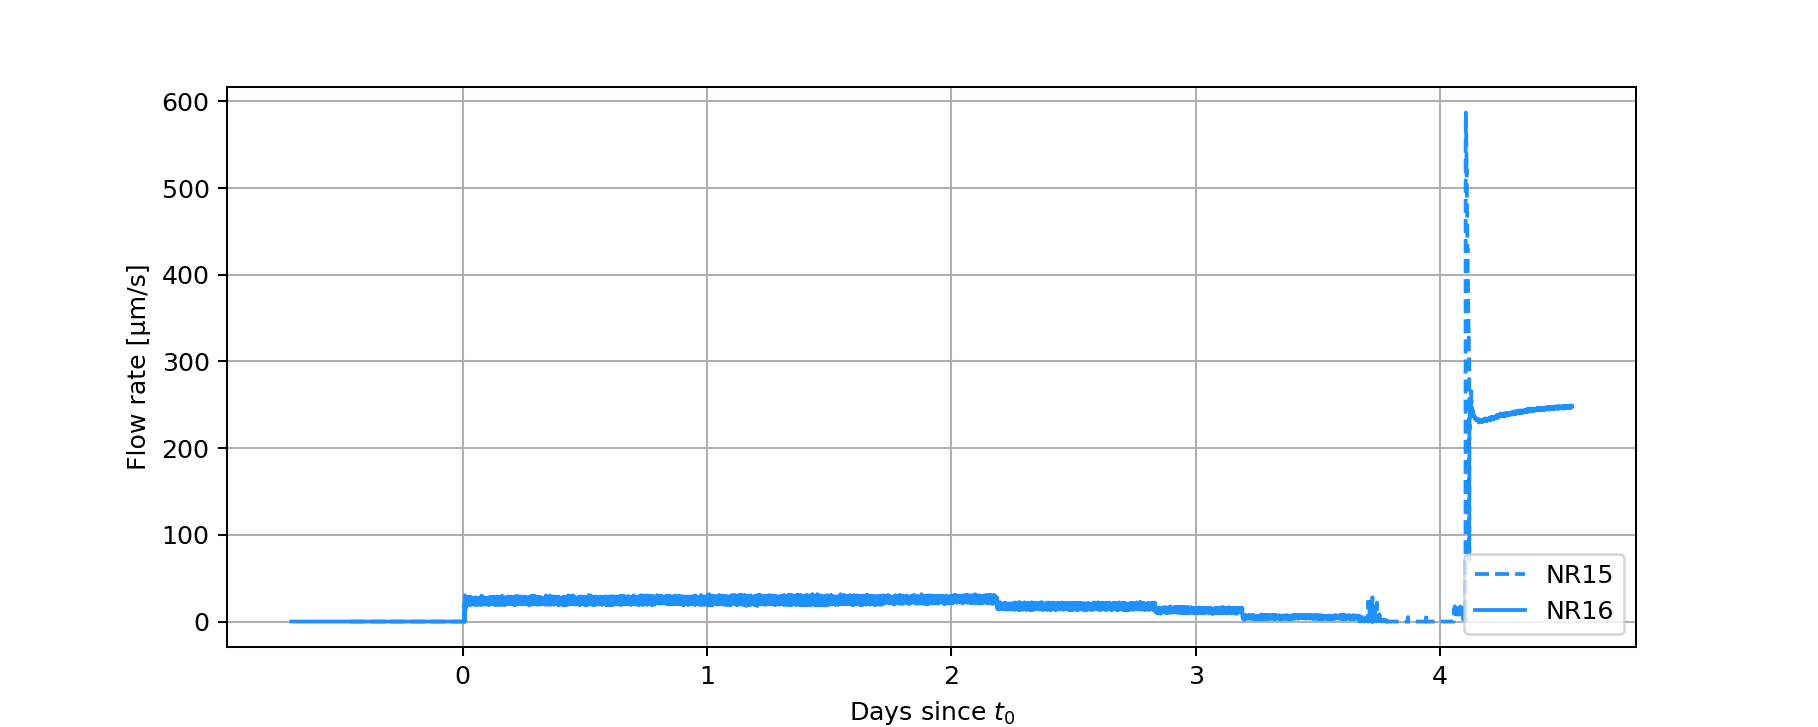

In [13]:
# %matplotlib notebook
f = plt.figure(figsize = (10,4))
a = plt.gca()
a.set_xlabel(r'Days since $t_0$')
a.set_ylabel('Flow rate [µm/s]')

ls_NR15 = "--"
ls_NR16 = "-"

c_FR = 'dodgerblue'

# ## Plot the PLC data for Run 15
a.plot(NR15_time_plc, data_plc_NR15[data_plc_NR15.keys()[8]], label='NR15', color=c_FR, ls=ls_NR15)

# ## Plot the PLC data for Run 16
a.plot(NR16_time_plc, data_plc_NR16[data_plc_NR16.keys()[8]], label='NR16', color=c_FR, ls=ls_NR16)

# a.set_yscale('log')

plt.grid()
plt.legend(loc="lower right")
# f.autofmt_xdate()
# myFmt = mdates.DateFormatter('%H:%M:%S')
# a.xaxis.set_major_formatter(myFmt)